In [1]:
# !conda install -c conda-forge scienceplots -y

In [2]:
import pandas as pd
import matplotlib as mpl
# mpl.use("pgf")

import matplotlib.pyplot as plt
import scienceplots
#plt.style.use()


In [3]:
mpl.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'bright',
 'cjk-jp-font',
 'cjk-kr-font',
 'cjk-sc-font',
 'cjk-tc-font',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'grid',
 'high-contrast',
 'high-vis',
 'ieee',
 'latex-sans',
 'light',
 'muted',
 'nature',
 'no-latex',
 'notebook',
 'petroff10',
 'pgf',
 'retro',
 'russian-font',
 'sans',
 'scatter',
 'science',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'std-colors',
 'tableau-colorblind10',
 'turkish-font',
 'vibrant']

In [4]:
# plt.style.use(['science', 'ieee'])
# mpl.rcParams.update({
#     # "pgf.texsystem": 'pdflatex',
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": [],
#     "pgf.rcfonts": False,
#     "pgf.preamble": "\n".join([
#           r'\usepackage{amsmath}',
#          r"\usepackage[utf8x]{inputenc}",
#          r"\usepackage[T1]{fontenc}",
#       #   r"\usepackage{cmbright}",
#     ]),
# })

In [5]:
color_map = {
    "ARM-CMSIS-DSP": "blue",
    "CMSIS-DSP": "blue",
    "TillJIT": "orange",
    "tIlljIt": "orange",
    "JIT": "orange",
    "ReferenceCM": "green",
    "Peak": "red",
    "Intrinsics": "purple"
}

Speedup Statistics (TillJIT-04.06. over ARM-CMSIS-DSP):
Average Speedup: 1.64x
Maximum Speedup: 1.94x
Minimum Speedup: 1.63x


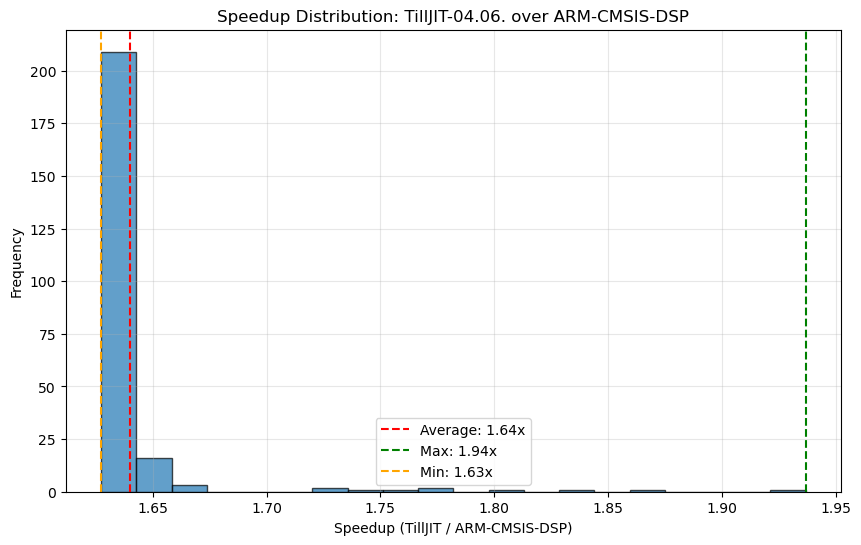

In [ ]:
def calculateSpeedup(data):
    # Filter data for TillJIT and ARM-CMSIS-DSP
    tilljit_data = data[data['Type'] == 'TillJIT-04.06.']
    arm_data = data[data['Type'] == 'ARM-CMSIS-DSP']

    # Merge datasets on common dimensions (M, K, N)
    merged_data = pd.merge(tilljit_data, arm_data, on=['M', 'K', 'N'], suffixes=('_tilljit', '_arm'))

    # Calculate speedup (TillJIT GFLOPS / ARM GFLOPS)
    merged_data['Speedup'] = merged_data['GFLOPS_tilljit'] / merged_data['GFLOPS_arm']

    # Calculate statistics
    average_speedup = merged_data['Speedup'].mean()
    median_speedup = merged_data['Speedup'].median()
    maximum_speedup = merged_data['Speedup'].max()
    minimum_speedup = merged_data['Speedup'].min()

    print(f"Speedup Statistics (TillJIT-04.06. over ARM-CMSIS-DSP):")
    print(f"Average Speedup: {average_speedup:.2f}x")
    print(f"Median Speedup: {median_speedup:.2f}x")
    print(f"Maximum Speedup: {maximum_speedup:.2f}x")
    print(f"Minimum Speedup: {minimum_speedup:.2f}x")

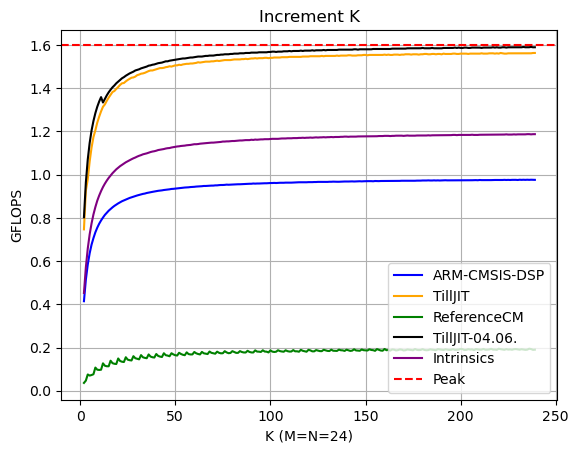

In [ ]:
data = pd.read_csv('gemm_growing_k.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    plt.plot(subset['K'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black').lower())

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('K (M=N=24)')
plt.ylabel('GFLOPS')
plt.legend()
plt.grid(True)
plt.title("Increment K")
plt.show()



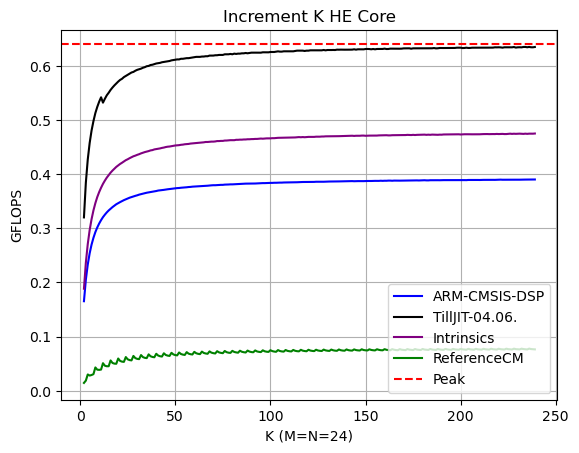

In [9]:
data = pd.read_csv('gemm_growing_k_he.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    plt.plot(subset['K'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black').lower())

plt.axhline(y=0.64, color='r', linestyle='--', label='Peak')
plt.xlabel('K (M=N=24)')
plt.ylabel('GFLOPS')
plt.legend()
plt.grid(True)
plt.title("Increment K HE Core")
plt.show()

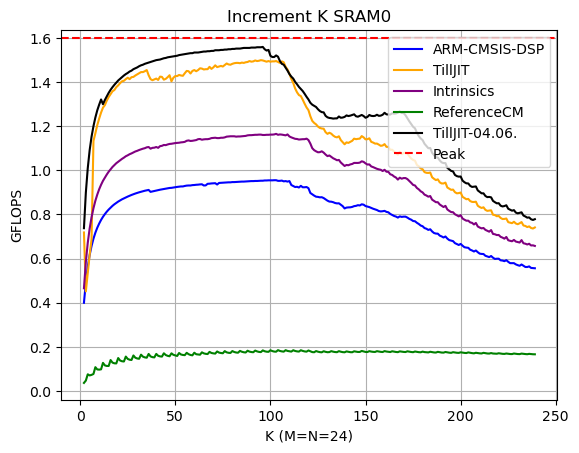

In [10]:
data = pd.read_csv('gemm_growing_k_sram0.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    plt.plot(subset['K'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'))

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('K (M=N=24)')
plt.ylabel('GFLOPS')
plt.legend()
plt.grid(True)
plt.title("Increment K SRAM0")
plt.show()

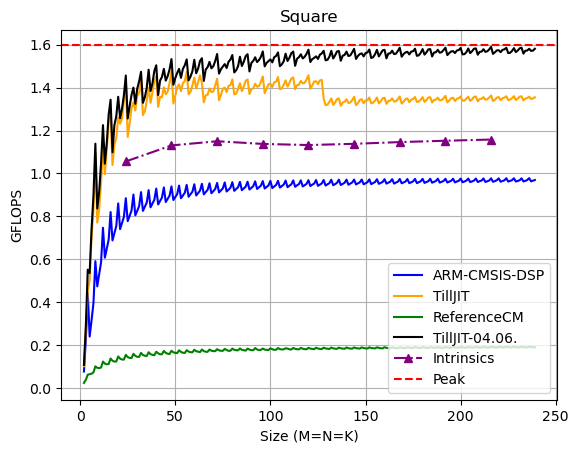

<Figure size 640x480 with 0 Axes>

In [11]:
plt.clf()
data = pd.read_csv('gemm_square_all.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    if type_exec == "Intrinsics":
        plt.plot(subset['M'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black').lower(), linestyle='-.', marker='^')
    else:
        plt.plot(subset['M'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black').lower())

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('Size (M=N=K)')
plt.ylabel('GFLOPS')
#plt.legend(loc='lower right')
plt.legend()
plt.grid(True)
plt.title("Square")
plt.show()
plt.savefig("square.pgf")

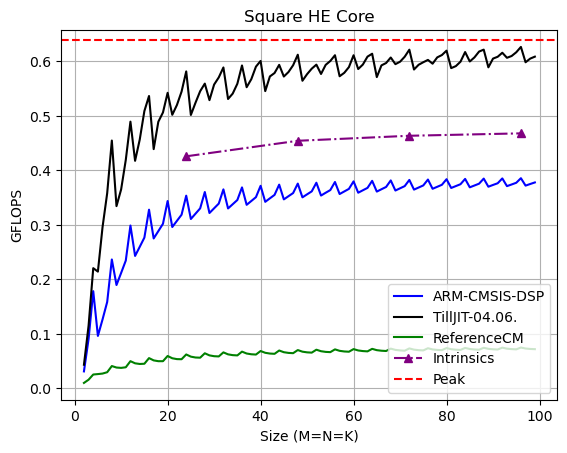

In [12]:
data = pd.read_csv('gemm_square_he.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    if type_exec == "Intrinsics":
        plt.plot(subset['M'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black').lower(), linestyle='-.', marker='^')
    else:
        plt.plot(subset['M'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black').lower())

plt.axhline(y=0.64, color='r', linestyle='--', label='Peak')
plt.xlabel('Size (M=N=K)')
plt.ylabel('GFLOPS')
plt.legend(loc='lower right')
plt.grid(True)
plt.title("Square HE Core")
plt.show()

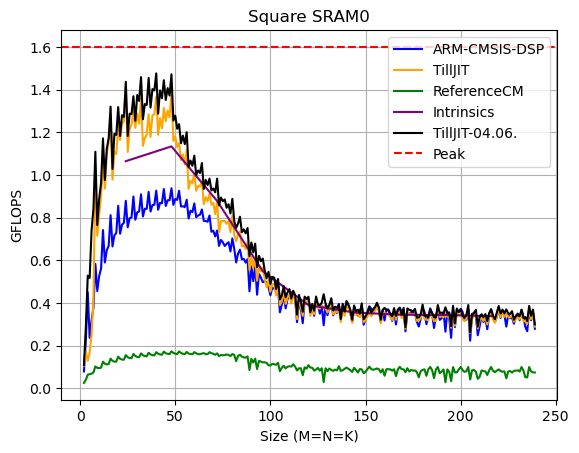

In [13]:
data = pd.read_csv('gemm_square_sram0.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    plt.plot(subset['M'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'))

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('Size (M=N=K)')
plt.ylabel('GFLOPS')
plt.legend(loc='upper right')
plt.grid(True)
plt.title("Square SRAM0")
plt.show()

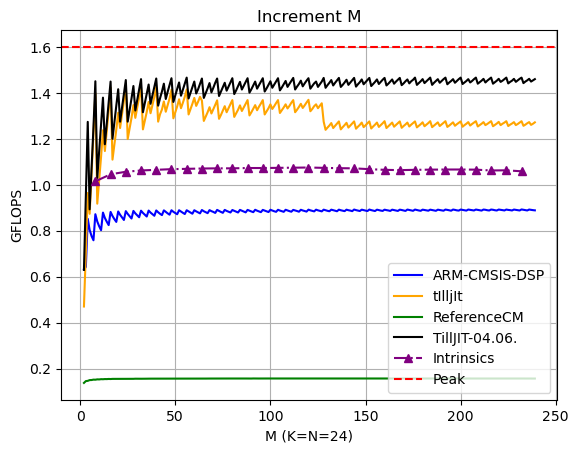

In [14]:
data = pd.read_csv('gemm_growing_m.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    if type_exec == "Intrinsics":
        plt.plot(subset['M'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'), linestyle='-.', marker='^')
    else:
        plt.plot(subset['M'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'))

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('M (K=N=24)')
plt.ylabel('GFLOPS')
plt.legend(loc='lower right')
plt.grid(True)
plt.title("Increment M")
plt.show()

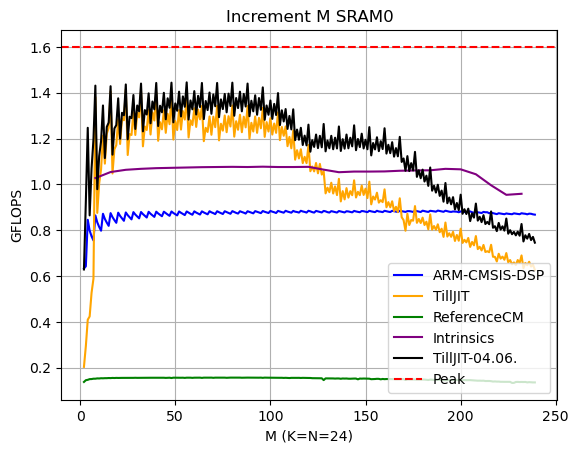

In [15]:
data = pd.read_csv('gemm_growing_m_sram0.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    plt.plot(subset['M'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'))

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('M (K=N=24)')
plt.ylabel('GFLOPS')
plt.legend(loc='lower right')
plt.grid(True)
plt.title("Increment M SRAM0")
plt.show()

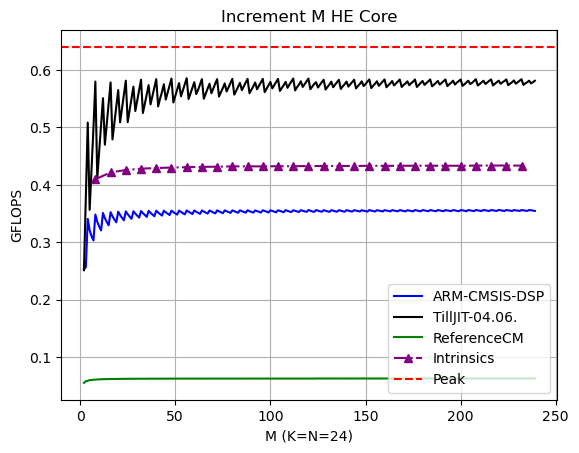

In [16]:
data = pd.read_csv('gemm_growing_m_he.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    if type_exec == "Intrinsics":
        plt.plot(subset['M'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'), linestyle='-.', marker='^')
    else:
        plt.plot(subset['M'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'))

plt.axhline(y=0.64, color='r', linestyle='--', label='Peak')
plt.xlabel('M (K=N=24)')
plt.ylabel('GFLOPS')
plt.legend(loc='lower right')
plt.grid(True)
plt.title("Increment M HE Core")
plt.show()

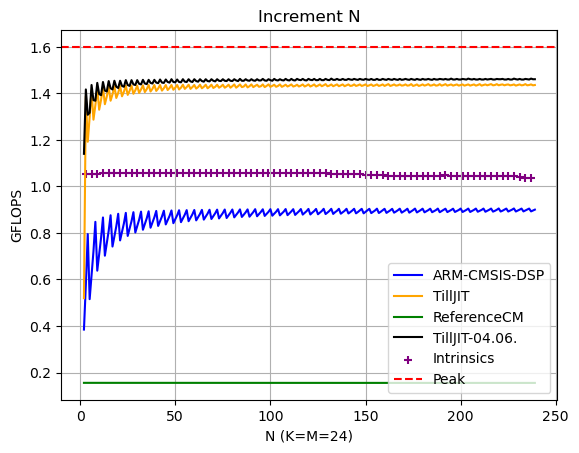

In [17]:
data = pd.read_csv('gemm_growing_n.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    if type_exec == "Intrinsics":
        plt.scatter(subset['N'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'), marker='+')
    else:
        plt.plot(subset['N'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'))

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('N (K=M=24)')
plt.ylabel('GFLOPS')
plt.legend(loc='lower right')
plt.grid(True)
plt.title("Increment N")
plt.show()

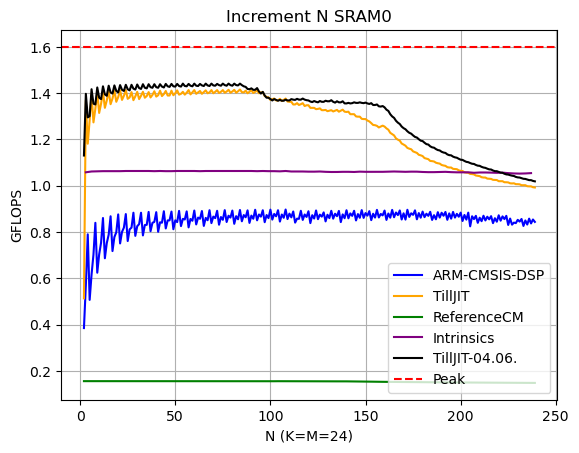

In [18]:
data = pd.read_csv('gemm_growing_n_sram0.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    plt.plot(subset['N'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'))

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('N (K=M=24)')
plt.ylabel('GFLOPS')
plt.legend(loc='lower right')
plt.grid(True)
plt.title("Increment N SRAM0")
plt.show()

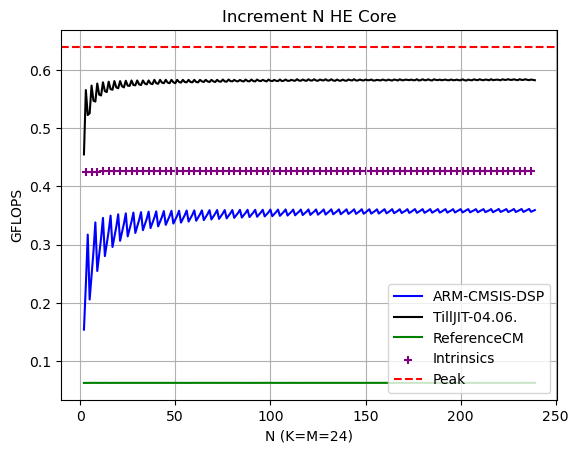

In [19]:
data = pd.read_csv('gemm_growing_n_he.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    if type_exec == "Intrinsics":
        plt.scatter(subset['N'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'), marker='+')
    else:
        plt.plot(subset['N'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'))

plt.axhline(y=0.64, color='r', linestyle='--', label='Peak')
plt.xlabel('N (K=M=24)')
plt.ylabel('GFLOPS')
plt.legend(loc='lower right')
plt.grid(True)
plt.title("Increment N HE Core")
plt.show()

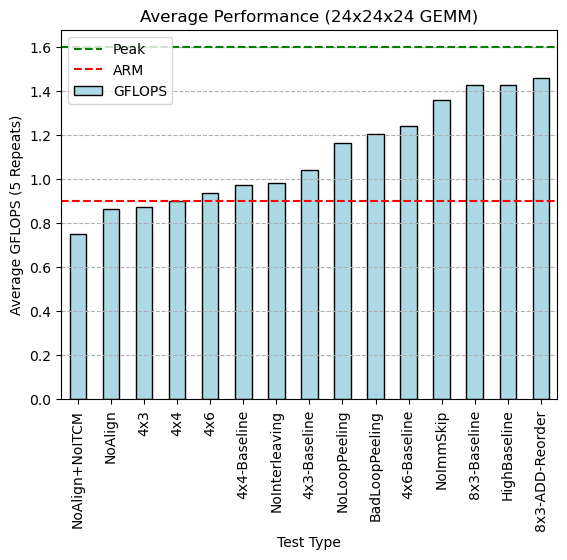

In [20]:
data = pd.read_csv('ablation.csv', sep=";")

# Calculate the average GFLOPS for each test type
average_gflops = data.groupby('Test')['GFLOPS'].mean()

# Create the bar plot
#plt.figure(figsize=(6, 6))
average_gflops = data.groupby('Test')['GFLOPS'].mean().sort_values(ascending=True)
average_gflops.plot(kind='bar', color='lightblue', edgecolor='black')

# Add labels and title
plt.xlabel('Test Type')
plt.ylabel('Average GFLOPS (5 Repeats)')
plt.title('Average Performance (24x24x24 GEMM)')
plt.grid(axis='y', linestyle='--', alpha=1)
plt.axhline(y=1.6, color='g', linestyle='--', label='Peak')
plt.axhline(y=0.9, color='r', linestyle='--', label='ARM')
plt.legend()
# Show the plot
plt.show()

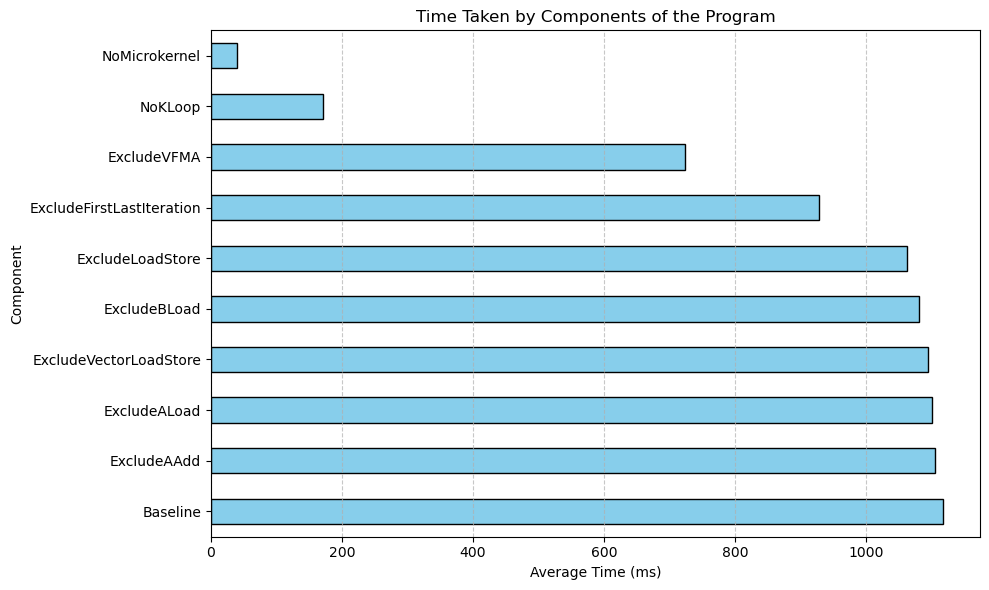

In [21]:
# Load the data
data = pd.read_csv('components_exclude.csv', sep=";")
data['Time'] = data['Time'].abs()
# Group by 'Test' and calculate the average time for each component
average_time = data.groupby('Test')['Time'].mean().sort_values(ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
average_time.plot(kind='barh', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Average Time (ms)')
plt.ylabel('Component')
plt.title('Time Taken by Components of the Program')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

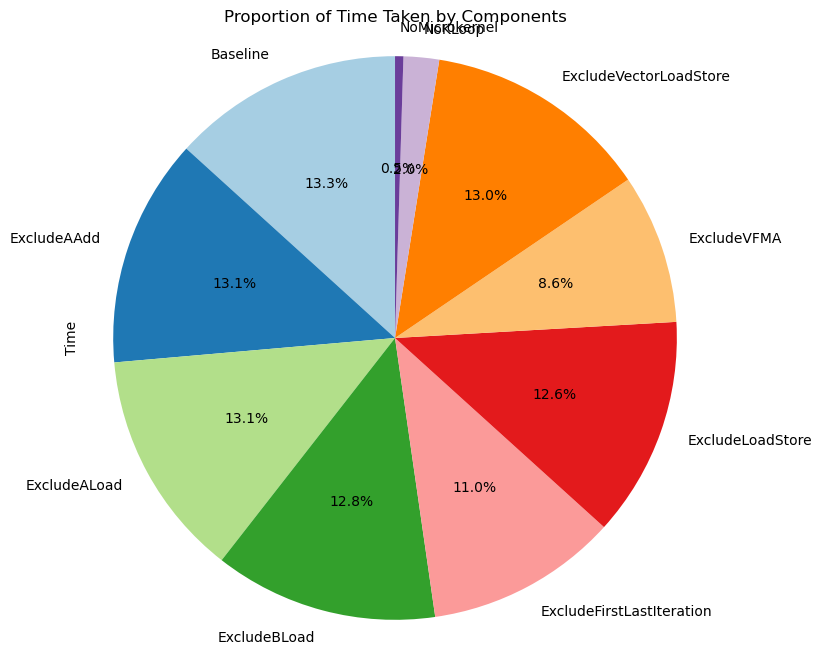

In [22]:
data = pd.read_csv('components_exclude.csv', sep=";")

# Take the absolute value of the 'Time' column
data['Time'] = data['Time'].abs()

# Group by 'Test' and calculate the total time for each component
total_time = data.groupby('Test')['Time'].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))
total_time.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add title
plt.title('Proportion of Time Taken by Components')

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Show the plot
plt.show()

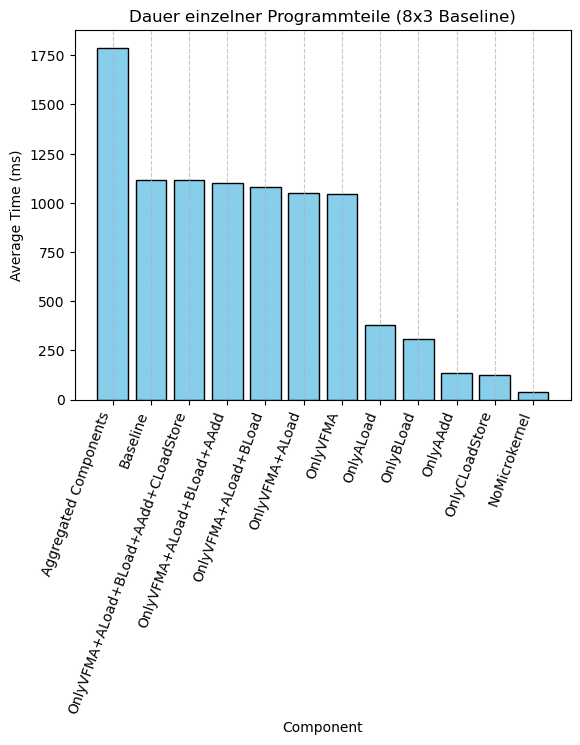

In [23]:
# Load the data
data = pd.read_csv('components_include_additive.csv', sep=";")
data['Time'] = data['Time'].abs()

average_time = data.groupby('Test')['Time'].mean().reset_index()
nomicrokernel_time = data[data['Test'] == 'NoMicrokernel']['Time'].mean()
aggregated_value = average_time[average_time['Test'].isin(['NoMicrokernel', 'OnlyCLoadStore', 'OnlyAAdd', 'OnlyBLoad', 'OnlyALoad', 'OnlyVFMA'])]['Time'].sum()
aggregated_value -= 6 * nomicrokernel_time

# Add the aggregated value as a new row using pd.concat
aggregated_row = pd.DataFrame({'Test': ['Aggregated Components'], 'Time': [aggregated_value]})
aggregated_data = pd.concat([average_time, aggregated_row], ignore_index=True)
aggregated_data = aggregated_data.sort_values(by='Time', ascending=False)


# Create a horizontal bar plot
plt.bar(aggregated_data['Test'], aggregated_data['Time'], color='skyblue', edgecolor='black')

# Add labels and title
plt.ylabel('Average Time (ms)')
plt.xlabel('Component')
plt.title('Dauer einzelner Programmteile (8x3 Baseline)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(rotation=70, ha='right')

# Show the plot
plt.show()

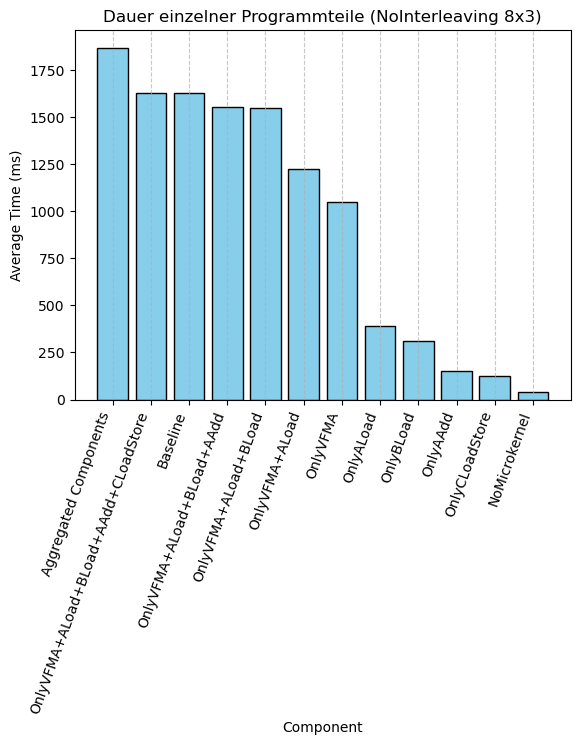

In [24]:
# Load the data
data = pd.read_csv('components_include_additive_slow.csv', sep=";")
data['Time'] = data['Time'].abs()

average_time = data.groupby('Test')['Time'].mean().reset_index()
nomicrokernel_time = data[data['Test'] == 'NoMicrokernel']['Time'].mean()
aggregated_value = average_time[average_time['Test'].isin(['NoMicrokernel', 'OnlyCLoadStore', 'OnlyAAdd', 'OnlyBLoad', 'OnlyALoad', 'OnlyVFMA'])]['Time'].sum()
aggregated_value -= 5 * nomicrokernel_time

# Add the aggregated value as a new row using pd.concat
aggregated_row = pd.DataFrame({'Test': ['Aggregated Components'], 'Time': [aggregated_value]})
aggregated_data = pd.concat([average_time, aggregated_row], ignore_index=True)
aggregated_data = aggregated_data.sort_values(by='Time', ascending=False)

# Create a horizontal bar plot
plt.bar(aggregated_data['Test'], aggregated_data['Time'], color='skyblue', edgecolor='black')

# Add labels and title
plt.ylabel('Average Time (ms)')
plt.xlabel('Component')
plt.title('Dauer einzelner Programmteile (NoInterleaving 8x3)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(rotation=70, ha='right')

# Show the plot
plt.show()

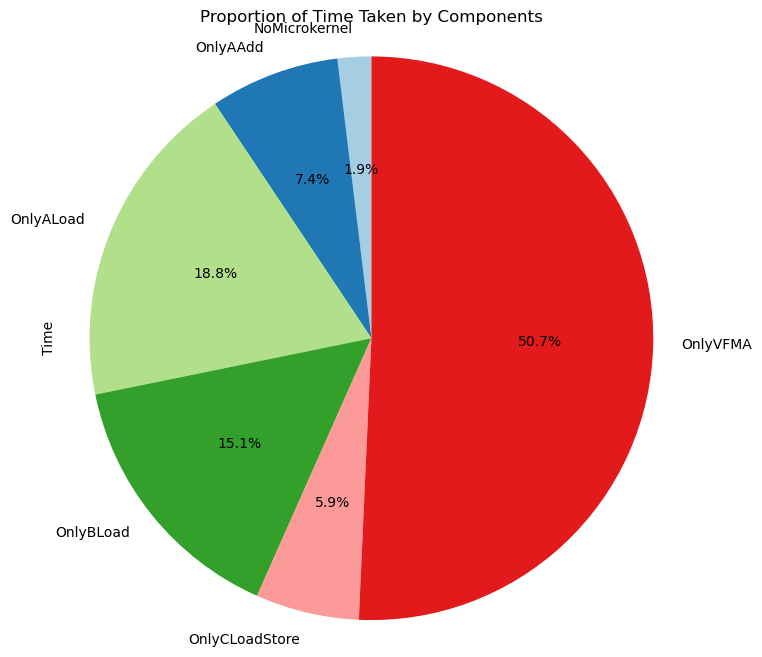

In [25]:
data = pd.read_csv('components_include_additive_slow.csv', sep=";")

# Take the absolute value of the 'Time' column
data['Time'] = data['Time'].abs()

# Group by 'Test' and calculate the total time for each component
total_time = data[data['Test'].isin(['NoMicrokernel', 'OnlyCLoadStore', 'OnlyAAdd', 'OnlyBLoad', 'OnlyALoad', 'OnlyVFMA'])].groupby('Test')['Time'].mean()

# Create the pie chart
plt.figure(figsize=(8, 8))
total_time.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add title
plt.title('Proportion of Time Taken by Components')

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Show the plot
plt.show()